In [1]:
import tensorflow 
import os
import cv2
import time
from skimage import io 
from PIL import Image, ImageFilter
import random 
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
# Importing and Loading the data into a data frame
dataset_path_train = 'Data/Training/'
dataset_path_test = 'Data/Testing/'
class_names = ['glioma', 'meningioma', 'notumor', 'pituitary']

In [3]:
## Importing training
training = {}
start = time.time()
for i in range(len(class_names)):
    tumor_path_train = os.path.join(dataset_path_train, class_names[i])
    training[class_names[i]+'_train'] = [Image.open(os.path.join(tumor_path_train, image)) for image in os.listdir(tumor_path_train)]

In [4]:
## Importing test
test = {}
for i in range(len(class_names)):
    tumor_path_test = os.path.join(dataset_path_test, class_names[i])
    test[class_names[i]+'_test'] = [Image.open(os.path.join(tumor_path_test, image)) for image in os.listdir(tumor_path_test)]
end = time.time()

### Resize:

In [5]:
x = 0
y = 0
n = 0
for i in range(len(class_names)):
    for j in range(len(training[class_names[i]+'_train'])):
        x += np.array(training[class_names[i]+'_train'][j]).shape[0]
        y += np.array(training[class_names[i]+'_train'][j]).shape[1]
        n += 1
av_height = int(y/n)
av_width = int(x/n)
av = int((av_height+av_width)/2)

In [6]:
for i in range(len(class_names)):
    for j in range(len(training[class_names[i]+'_train'])):
        if len(np.array(training[class_names[i]+'_train'][j]).shape)==2:
            training[class_names[i]+'_train'][j] = Image.fromarray(cv2.cvtColor(np.array(training[class_names[i]+'_train'][j],dtype=np.uint8),cv2.COLOR_GRAY2RGB)).resize((av,av))
        else:
            training[class_names[i]+'_train'][j] = Image.fromarray(np.array(training[class_names[i]+'_train'][j])).resize((av,av))

In [7]:
for i in range(len(class_names)):
    for j in range(len(test[class_names[i]+'_test'])):
        if len(np.array(test[class_names[i]+'_test'][j]).shape)==2:
            test[class_names[i]+'_test'][j] = Image.fromarray(cv2.cvtColor(np.array(test[class_names[i]+'_test'][j],dtype=np.uint8),cv2.COLOR_GRAY2RGB)).resize((av,av))
        else:
            test[class_names[i]+'_test'][j] = Image.fromarray(np.array(test[class_names[i]+'_test'][j])).resize((av,av))

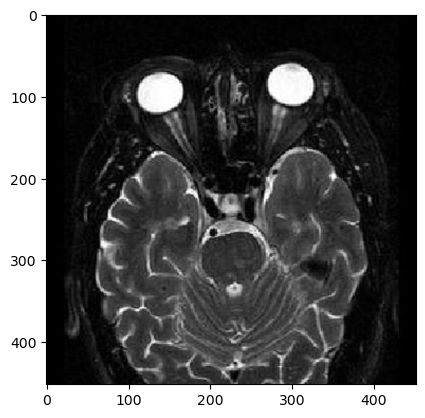

In [8]:
# Test to see if successfully imported
i, (im1) = plt.subplots(1)
i.set_figwidth(15)
im1.imshow(training[class_names[2]+'_train'][1])

In [9]:
# Training to array
for i in range(len(class_names)):
    for j in range(len(training[class_names[i]+'_train'])):
        training[class_names[i]+'_train'][j] = np.array(training[class_names[i]+'_train'][j])

In [10]:
## Test to array
for i in range(len(class_names)):
    for j in range(len(test[class_names[i]+'_test'])):
        test[class_names[i]+'_test'][j] = np.array(test[class_names[i]+'_test'][j])

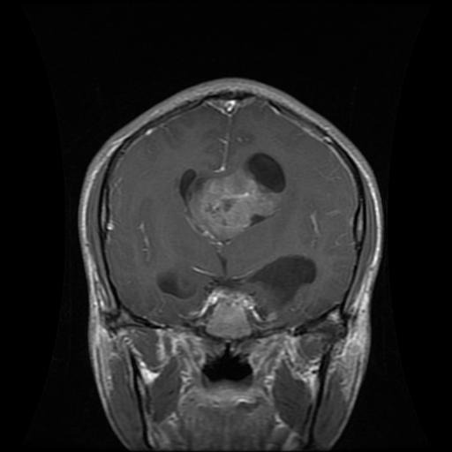

In [11]:
## Test checkpoint
Image.fromarray(training[class_names[0]+'_train'][1])

## Augmenting Data:

In [12]:
new_training = training

### Flipping

In [13]:
for i in range(len(class_names)):
    for j in range(len(training[class_names[i]+'_train'])):
        new_training[class_names[i]+'_train'].append(np.fliplr(training[class_names[i]+'_train'][j]))
        new_training[class_names[i]+'_train'].append(np.flipud(training[class_names[i]+'_train'][j]))

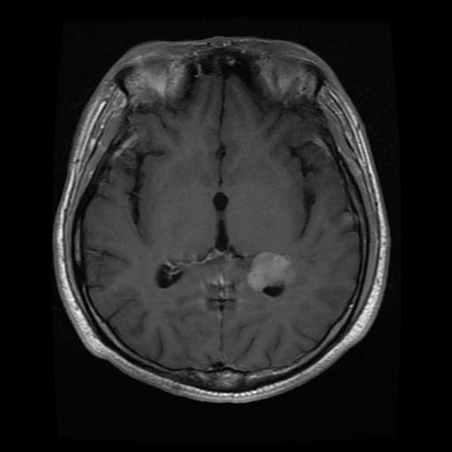

In [14]:
Image.fromarray(new_training[class_names[1]+'_train'][2])

### Random Cropping:

In [15]:
def random_crop(image):
    cropped_image = tensorflow.image.random_crop(image, size=[300, 300,3])
    resized = tensorflow.image.resize(cropped_image, (av, av))
    resized_image_pil = tensorflow.keras.utils.array_to_img(resized)
    return resized_image_pil

In [16]:
for i in range(len(class_names)):
    for j in range(len(training[class_names[i]+'_train'])):
        new_training[class_names[i]+'_train'].append(random_crop(training[class_names[i]+'_train'][j]))

### Blur

In [ ]:
for i in range(len(class_names)):
    for j in range(len(training[class_names[i]+'_train'])):
        if type(training[class_names[i]+'_train'][j])== Image.Image:
            new_training[class_names[i]+'_train'].append(training[class_names[i]+'_train'][j].filter(ImageFilter.BoxBlur(4)))
        else:
            new_training[class_names[i]+'_train'].append(Image.fromarray(training[class_names[i]+'_train'][j]).filter(ImageFilter.BoxBlur(4)))

### Removing potential noise

In [ ]:
for i in range(len(class_names)):
    for j in range(len(new_training[class_names[i]+'_train'])):
        new_training[class_names[i]+'_train'][j] = Image.fromarray(cv2.fastNlMeansDenoising(np.array(new_training[class_names[i]+'_train'][j])))        

In [ ]:
for i in range(len(class_names)):
    for j in range(len(new_training[class_names[i]+'_test'])):
        test[class_names[i]+'_test'][j] = Image.fromarray(cv2.fastNlMeansDenoising(test[class_names[i]+'_test'][j]))        

## Exporting data:

In [ ]:
## Training data
train_path = 'NewData/Training/'
for i range(len(class_names)):
    for j in range(len(training[class_names[i]+'_train'])):
        new_training[class_names[i]+'_train'][j].save(train_path+class_names[i]+'/'+str(j)+'.jpg')

In [ ]:
## Test data
test_path = 'NewData/Testing/'
for i range(len(class_names)):
    for j in range(len(test[class_names[i]+'_train'])):
        test[class_names[i]+'_test'][j].save(test_path+class_names[i]+'/'+str(j)+'.jpg')